<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Homework4/Homework4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Imports and attaching drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
# Binary map Outputs to 0 or 1
# M = 1
# B = 0
# Map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

dataset[['diagnosis']] = dataset[['diagnosis']].apply(binary_map)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
# Seperate data into inputs and outputs
x_vars = np.arange(2, 31, 1)
X = dataset.iloc[:, x_vars].values
Y = dataset.iloc[:, 1].values
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01])

In [31]:
# Split into test and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 77)

# Standarize the data sets to remove size differences
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)
X_test = stdScaler.transform(X_test)
X_train[0]

array([-0.4945943 , -0.98985853, -0.55895703, -0.5198997 , -1.18927253,
       -1.32413762, -0.97973159, -0.98053325, -0.98270605, -0.70631119,
       -1.03420199, -0.9998323 , -1.02812034, -0.67574172, -1.24473953,
       -1.13009989, -0.8171219 , -1.29627644, -0.43366822, -0.89590008,
       -0.64272829, -0.87111472, -0.70371596, -0.60002727, -1.24677316,
       -1.10916375, -1.00729457, -1.1321471 , -0.01706615])

In [32]:
# Run PCA with different K's and compute Linear SVM accuracies
K = np.arange(1, 25, 1)
Lin_acc = []
Lin_prec = []
Lin_rec = []

for k in K:
    pca = PCA(n_components=k)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)

    clf = SVC(kernel='linear', C=1e2)
    clf.fit(pc_train, Y_train)
    # Predict the output using the trained classifier
    Y_pred = clf.predict(pc_test)

    Lin_acc.append(clf.score(pc_test, Y_test))
    Lin_prec.append(metrics.precision_score(Y_test, Y_pred))
    Lin_rec.append(metrics.recall_score(Y_test, Y_pred))

    #print('K:', k)
    #print('Training accuracy:', clf.score(pc_train, Y_train))
    #print('Test accuracy:', clf.score(pc_test, Y_test))
    ## Using the metrics class to find distinct values
    #print("Precision:",metrics.precision_score(Y_test, Y_pred))
    #print("Recall:",metrics.recall_score(Y_test, Y_pred))
    #print("F1:", metrics.f1_score(Y_test, Y_pred))
    #print('')

In [33]:
# Run PCA with different K's and compute RBF SVM accuracies
K = np.arange(1, 25, 1)
RBF_acc = []
RBF_prec = []
RBF_rec = []

for k in K:
    pca = PCA(n_components=k)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)

    clf = SVC(kernel='rbf', C=1e2, gamma='scale')
    clf.fit(pc_train, Y_train)
    # Predict the output using the trained classifier
    Y_pred = clf.predict(pc_test)

    RBF_acc.append(clf.score(pc_test, Y_test))
    RBF_prec.append(metrics.precision_score(Y_test, Y_pred))
    RBF_rec.append(metrics.recall_score(Y_test, Y_pred))

    #print('K:', k)
    #print('Training accuracy:', clf.score(pc_train, Y_train))
    #print('Test accuracy:', clf.score(pc_test, Y_test))
    ## Using the metrics class to find distinct values
    #print("Precision:",metrics.precision_score(Y_test, Y_pred))
    #print("Recall:",metrics.recall_score(Y_test, Y_pred))
    #print("F1:", metrics.f1_score(Y_test, Y_pred))
    #print('')

In [34]:
# Run PCA with different K's and compute Polynomial SVM accuracies
K = np.arange(1, 25, 1)
Poly_acc = []
Poly_prec = []
Poly_rec = []

for k in K:
    pca = PCA(n_components=k)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)

    clf = SVC(kernel='poly', C=1e2, degree=3, gamma='scale')
    clf.fit(pc_train, Y_train)
    # Predict the output using the trained classifier
    Y_pred = clf.predict(pc_test)

    Poly_acc.append(clf.score(pc_test, Y_test))
    Poly_prec.append(metrics.precision_score(Y_test, Y_pred))
    Poly_rec.append(metrics.recall_score(Y_test, Y_pred))

    #print('K:', k)
    #print('Training accuracy:', clf.score(pc_train, Y_train))
    #print('Test accuracy:', clf.score(pc_test, Y_test))
    ## Using the metrics class to find distinct values
    #print("Precision:",metrics.precision_score(Y_test, Y_pred))
    #print("Recall:",metrics.recall_score(Y_test, Y_pred))
    #print("F1:", metrics.f1_score(Y_test, Y_pred))
    #print('')

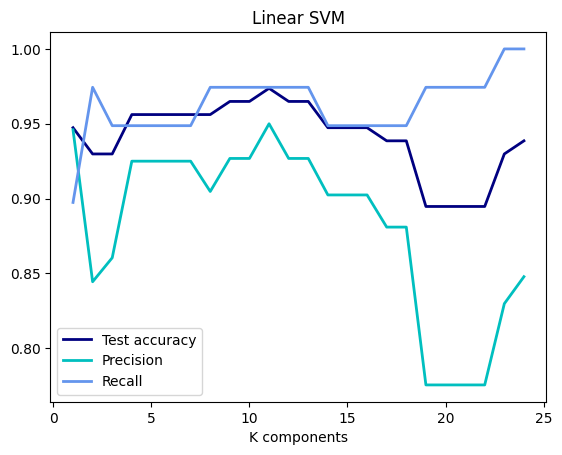

In [35]:
# Graphing the results compared to K values
lw = 2
plt.plot(K, Lin_acc, color='navy', lw=lw, label='Test accuracy')
plt.plot(K, Lin_prec, color='c', lw=lw, label='Precision')
plt.plot(K, Lin_rec, color='cornflowerblue', lw=lw, label='Recall')
plt.xlabel('K components')
plt.title('Linear SVM')
plt.legend()
plt.show()

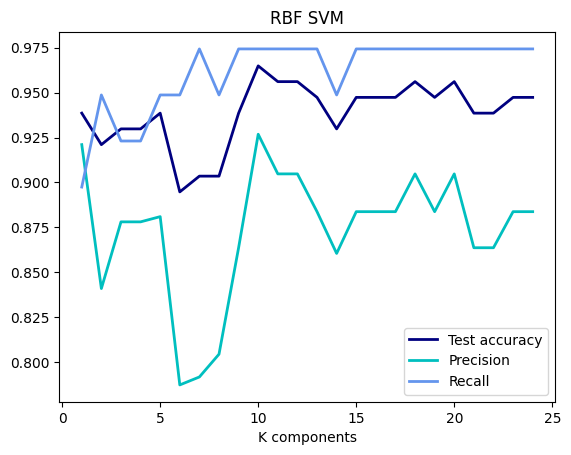

In [36]:
# Graphing the results compared to K values
lw = 2
plt.plot(K, RBF_acc, color='navy', lw=lw, label='Test accuracy')
plt.plot(K, RBF_prec, color='c', lw=lw, label='Precision')
plt.plot(K, RBF_rec, color='cornflowerblue', lw=lw, label='Recall')
plt.xlabel('K components')
plt.title('RBF SVM')
plt.legend()
plt.show()

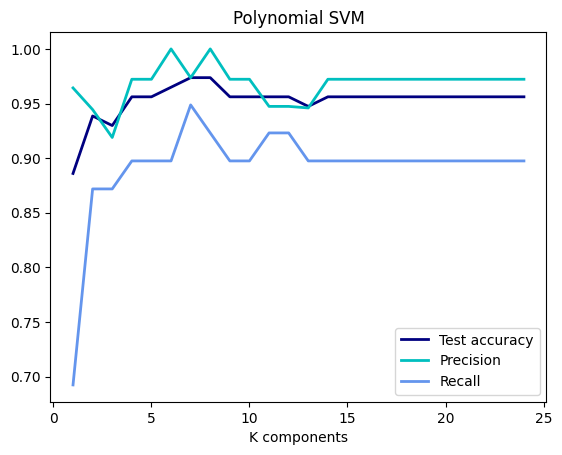

In [37]:
# Graphing the results compared to K values
lw = 2
plt.plot(K, Poly_acc, color='navy', lw=lw, label='Test accuracy')
plt.plot(K, Poly_prec, color='c', lw=lw, label='Precision')
plt.plot(K, Poly_rec, color='cornflowerblue', lw=lw, label='Recall')
plt.xlabel('K components')
plt.title('Polynomial SVM')
plt.legend()
plt.show()